# Sales Performance and Customer Behaviour Analysis

#### This project analysis sales data and draws insights on factors affecting sales so as to help the business make better informed decisions

## Importing necessary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading csv file to DataFrame and keeping a copy

In [ ]:
df = pd.read_csv("sales_data.csv")
df_raw = df.copy() #keeping copy of original dataframe just in case of mistakes
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## Check if any of the columns in the DataFrame have empty values

In [7]:
df.isnull().any() # Postal Code has some empty values

Row ID           False
Order ID         False
Order Date       False
Ship Date        False
Ship Mode        False
Customer ID      False
Customer Name    False
Segment          False
Country          False
City             False
State            False
Postal Code       True
Region           False
Product ID       False
Category         False
Sub-Category     False
Product Name     False
Sales            False
dtype: bool

## Checking length of the DataFrame

In [9]:
len(df) # length of the DataFrame is 9800

9800

## Checking number of empty values

In [11]:
df["Postal Code"].isna().sum() #There are 11 empty/missing values meaning there are 9789 non empty values

11

In [12]:
df.info() # to see if Order Date and Ship Date are of compatible date time formats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

## Convert dates to standard datetime format

In [14]:
# Converting Order Date to standard datetime format

# dayfirst: to ensure that it follows the DD/MM/YYYY format
# errors: to ensure that it converts non-date like values to NaT instead of stopping and returning error during runtime

df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst= True, errors= 'coerce')

#Converting Ship Date to standard datetime format
df["Ship Date"] = pd.to_datetime(df["Ship Date"], dayfirst= True, errors = 'coerce')

In [22]:
df.info() # Order Date and Ship Date time format has been changed from "object" to "datetiem64[ns]"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [24]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


# Exploratory Data Analysis (EDA)

## 1. Total sales by month

In [28]:
# Creating a DataFrame called "df_copy" to practice with 
df_copy = df.copy()

# Making a column for names of the month
df_copy["Month Name"] = df_copy["Order Date"].dt.month_name()
df_copy["Month Name"] 

0       November
1       November
2           June
3        October
4        October
          ...   
9795         May
9796     January
9797     January
9798     January
9799     January
Name: Month Name, Length: 9800, dtype: object

In [ ]:
monthly_sales = df_copy.groupby("Month Name")["Sales"].sum()
monthly_sales = pd.DataFrame(monthly_sales)

# Arranging in Descending order
monthly_sales = monthly_sales.sort_values(by='Sales', ascending= False) # by: what column of values are we sorting by, ascending = True: Sort in ascending order, ascending = False: Sort in Descending order
monthly_sales = monthly_sales.reset_index()
monthly_sales

,Month Name,Sales
0,November,350161.7110
1,December,321480.1695
2,September,300103.4117
3,October,199496.2947
4,March,197573.5872
5,August,157315.9270
6,May,154086.7237
7,June,145837.5233
8,July,145535.6890
9,April,136283.0006


In [52]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

monthly_sales["Month Name"] = pd.Categorical(monthly_sales["Month Name"],
                                             categories = months,
                                             ordered = True)

monthly_sales = monthly_sales.sort_values(by="Month Name").reset_index(drop=True)
monthly_sales

,Month Name,Sales
0,January,94291.6296
1,February,59371.1154
2,March,197573.5872
3,April,136283.0006
4,May,154086.7237
5,June,145837.5233
6,July,145535.6890
7,August,157315.9270
8,September,300103.4117
9,October,199496.2947


### Line Graph for Monthly Sales

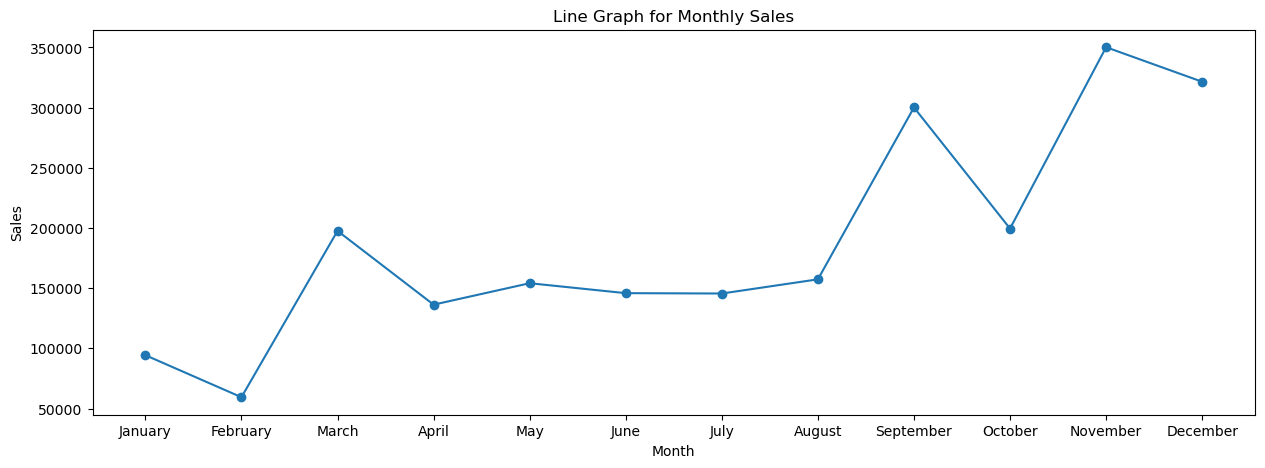

In [55]:
# Increasing the size of the plot
plt.figure(figsize=(15,5))

# Plotting Data
plt.plot(monthly_sales["Month Name"],  monthly_sales["Sales"], marker = "o") # marker: character used for marking where x intersects with y

# Labelling x and y axis
plt.xlabel("Month")
plt.ylabel("Sales")

# Title of Plot
plt.title("Line Graph for Monthly Sales")
# Displaying Plot
plt.show()

Majority Sales take place on **September, November and December** with **November** being the **PEAK** period of sales.  
The Minority sales take place mostly in **January** and **Feburary** with **February** being the least period.

## 2. Top 10 Products

In [ ]:
## Step 1: Group Sales by Product 
product_sales = df_copy.groupby("Product Name")["Sales"].sum() # Takes sum of all sales of it's corresponding product
product_sales = pd.DataFrame(product_sales)

product_sales = product_sales.reset_index().sort_values(by= "Sales", ascending= False) # Make Product Name a column in product_sales DataFrame
                                                                                       # and then sort by descending order
product_sales = product_sales.head(10) #Selecting the first 10 sorted rows
numbers = [i for i in range(1, 11)] #the new numbers/indexes
product_sales.index = numbers
product_sales

,Product Name,Sales
1,Canon imageCLASS 2200 Advanced Copier,61599.824
2,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
3,Cisco TelePresence System EX90 Videoconferenci...,22638.480
4,HON 5400 Series Task Chairs for Big and Tall,21870.576
5,GBC DocuBind TL300 Electric Binding System,19823.479
6,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
7,Hewlett Packard LaserJet 3310 Copier,18839.686
8,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
9,GBC DocuBind P400 Electric Binding System,17965.068
10,High Speed Automatic Electric Letter Opener,17030.312


### Top 10 products bar chart

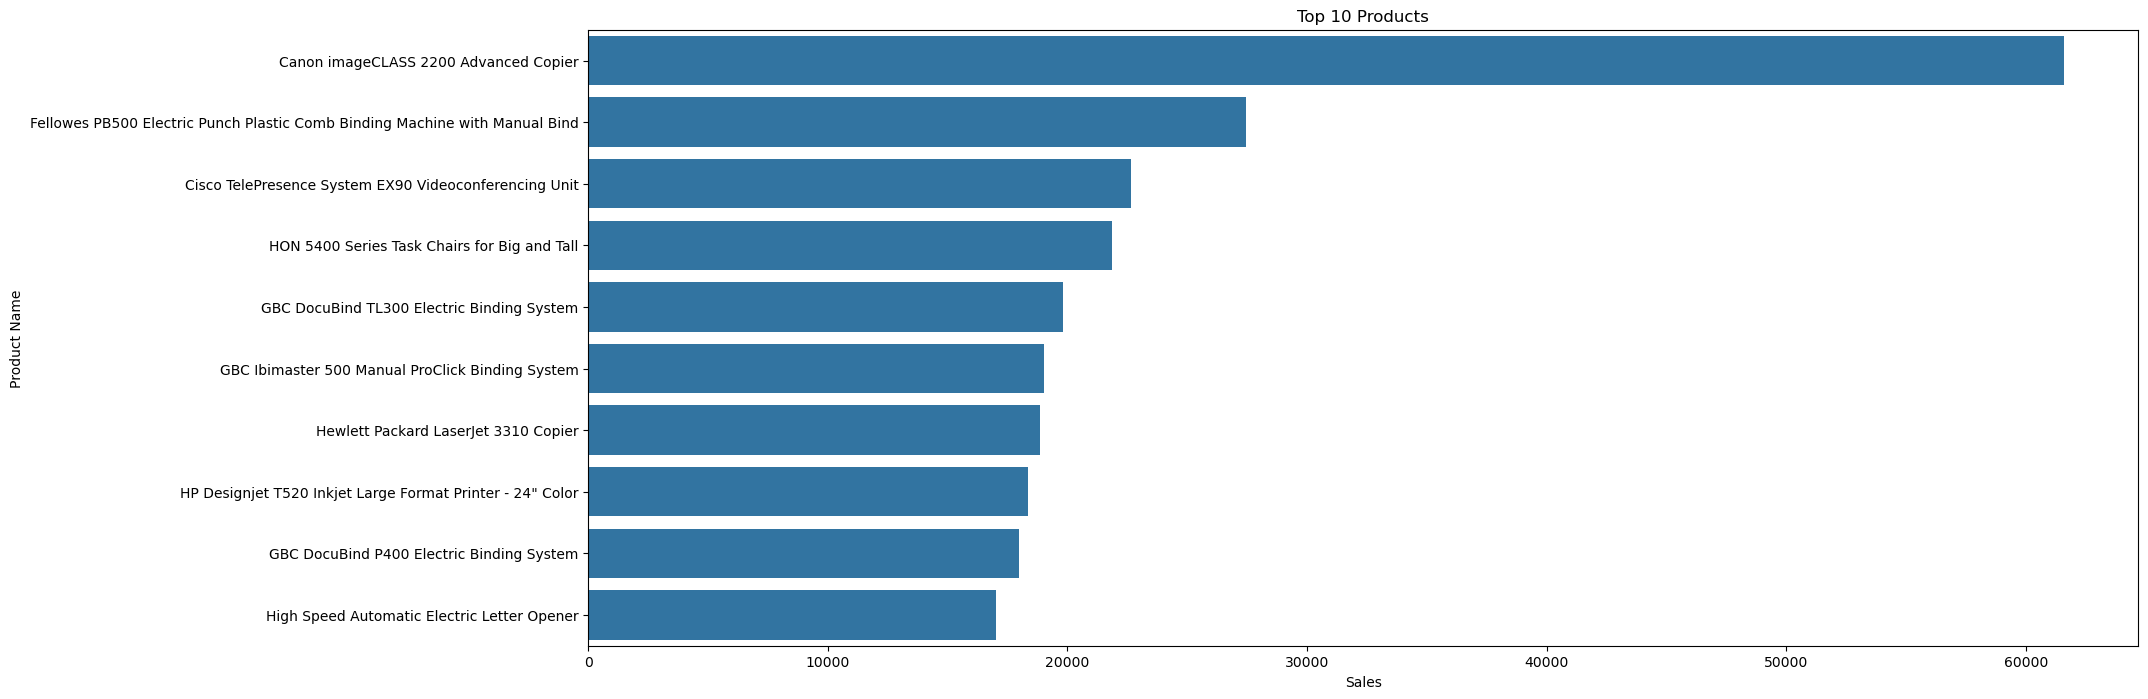

In [117]:
# Plotting bar chart for top 10 products
plt.figure(figsize=(20,8))

sns.barplot(
    x= "Sales",
    y= "Product Name",
    data=product_sales)
   
# Giving the plot a title
plt.title("Top 10 Products")
# Displaying plot
plt.show()

From the bar chart, the product **Canon imageCLASS 2200 Advanced Copier** generates the most sales but only about 2% of all sales.  
It surpasses the second product by **34,146.441** in sales.

## 3. Sales by Region

In [ ]:
# Group Sales by Region
region_sales = pd.DataFrame(df_copy.groupby("Region")["Sales"].sum()).reset_index().sort_values(by="Sales", ascending= False)
region_sales.index = [i for i in range(1, len(region_sales)+1)]
region_sales

,Region,Sales
1,West,710219.6845
2,East,669518.7260
3,Central,492646.9132
4,South,389151.4590


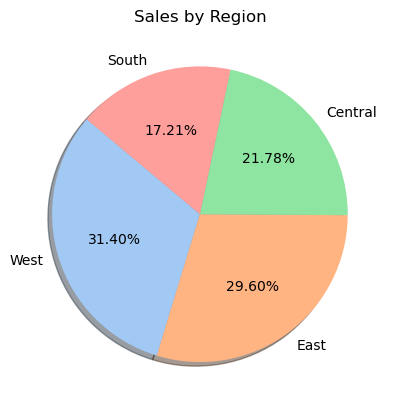

In [133]:
# Colour Palette (Where our colours are)
colours = sns.color_palette("pastel")[0:4]

#Plotting pie chart
sizes = region_sales["Sales"]
labels = region_sales["Region"]

plt.pie(sizes, 
        labels= labels, 
        colors= colours, 
        autopct= '%.2f%%', 
        startangle= 140, 
        shadow = True)

# Display title of pie chart
plt.title("Sales by Region")
#Display chart
plt.show()

## 3. Customer Segments  
Which customer segment generates the most sales?

In [170]:
customer_seg = pd.DataFrame(df_copy.groupby("Segment")["Sales"].sum()).reset_index().sort_values(by="Sales", ascending = False)
customer_seg.index = [i for i in range(1, len(customer_seg)+1)]
customer_seg

,Segment,Sales
1,Consumer,1.148061e+06
2,Corporate,6.884941e+05
3,Home Office,4.249822e+05


### Customer Segments Pie Chart

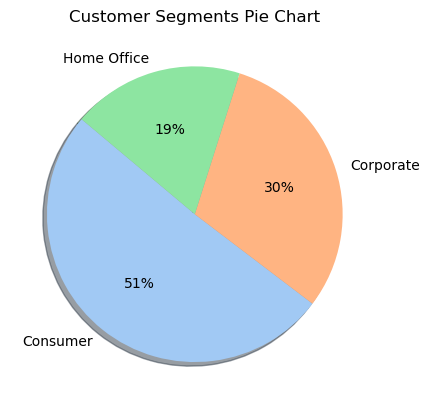

In [173]:
# Colour Palette (Where our colours are)
colours = sns.color_palette("pastel")[0:3]

# Data to plot
cust_seg_labels = customer_seg['Segment']
cust_seg_sizes = customer_seg['Sales']
# Making the pie chart larger

# Plotting the pie chart

plt.pie(cust_seg_sizes, 
        labels= cust_seg_labels, 
        colors= colours, 
        autopct= '%.0f%%', 
        startangle= 140, 
        shadow = True)

#Giving it a title
plt.title("Customer Segments Pie Chart")

# Displaying the pie chart on the terminal
plt.show()

From the pie chart Consumers contribute to **51%** of Sales.  
That is **HALF** and **1%** of entire sales.

## Key Business Insights and Recommendations

**Key Insights:**
- Sales peak in **November**, with **September**, **November**, and **December** collectively accounting for the highest monthly sales, showing seasonal demand.
- **January** has the lowest sales, likely due to post-holiday slowdown.
- The **Consumer segment** contributes **51%** of total sales, making it the most valuable customer group, followed by the **Corporate segment** at **30%**.
- The **Canon imageCLASS 2200 Advanced Copier** is the top-selling product, indicating strong demand for office equipment.
- **West** and **East** regions together account for **61%** of sales, highlighting regional concentration.
  

**Business Recommendations:**
- **Capitalize on High-Sales Months:** Focus marketing campaigns, promotions, and inventory management on **September**, **November**, and **December**, when sales peak.
- **Boost Low-Sales Periods:** Introduce targeted offers or bundles in **January** to counteract the post-holiday slowdown.
- **Prioritize the Consumer Segment:** With **51%** of total sales, this segment is key. Implement loyalty programs and personalized marketing to retain and grow these customers.
- **Grow Corporate Segment Revenue:** The **Corporate segment** contributes **30% of sales**, indicating room for growth. Launch B2B promotions and bulk discount programs to expand this segment.
- **Focus on Top-Selling Products:** Ensure adequate stock and marketing support for high-demand products like the **Canon imageCLASS 2200 Advanced Copier** to maximize revenue.
- **Strategic Regional Efforts:** **West** and **East regions** account for **61% of sales**. Allocate marketing resources and inventory strategically to these regions while exploring opportunities in underperforming regions.
  